<html>
    <h1 style="color:blue;text-align: center;">Feature Engineering</h1>
    <h2 style="color:green;text-align: center;">One Hot Encoding | Handling Categorical Data</h2>
</html>

In [1]:
# 1. Import the requests library
import requests

URL = "https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day27-one-hot-encoding/cars.csv"
# 2. download the data behind the URL
response = requests.get(URL)

# 3. Open the response into a new file called instagram.ico
open("cars.csv", "wb").write(response.content)

324046

>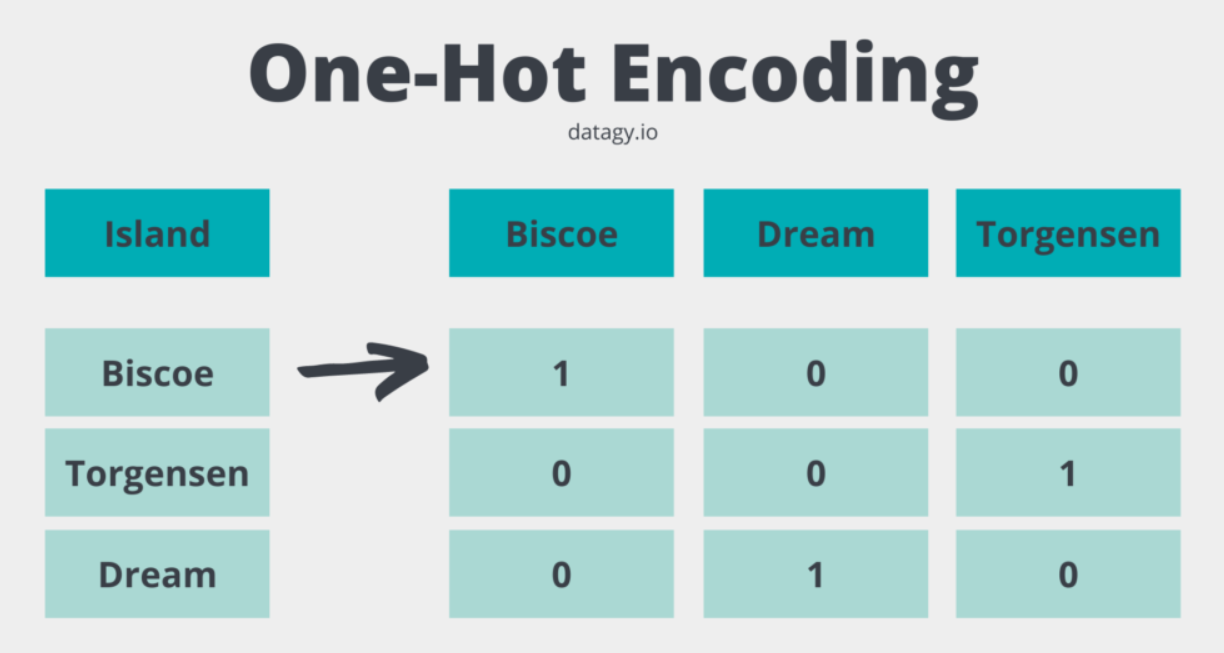

If we drop first column `Biscoe` then OneHotEncoding will be :

>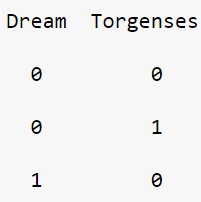

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv('cars.csv')

In [46]:
df_small = df.sample(5)

In [47]:
df_small = df_small.reset_index()

In [48]:
df_small

,index,brand,km_driven,fuel,owner,selling_price
0,5391,Maruti,38000,Petrol,Second Owner,350000
1,6944,Tata,80000,Diesel,Third Owner,100000
2,7727,Renault,90000,Diesel,Second Owner,600000
3,4900,Ford,93415,Diesel,First Owner,400000
4,4765,Ford,64000,Diesel,First Owner,1275000


In [49]:
df_small = df_small[['brand','fuel','owner']]

In [50]:
df_small

,brand,fuel,owner
0,Maruti,Petrol,Second Owner
1,Tata,Diesel,Third Owner
2,Renault,Diesel,Second Owner
3,Ford,Diesel,First Owner
4,Ford,Diesel,First Owner


## OneHotEncoding with Default parameters

In [51]:
ohe = OneHotEncoder()
ohe.fit(df_small)

OneHotEncoder()

In [52]:
ohe.categories_

[array(['Ford', 'Maruti', 'Renault', 'Tata'], dtype=object),
 array(['Diesel', 'Petrol'], dtype=object),
 array(['First Owner', 'Second Owner', 'Third Owner'], dtype=object)]

In [53]:
ohe.transform(df_small)

<5x9 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [54]:
ohe.transform(df_small).toarray()

array([[0., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.]])

>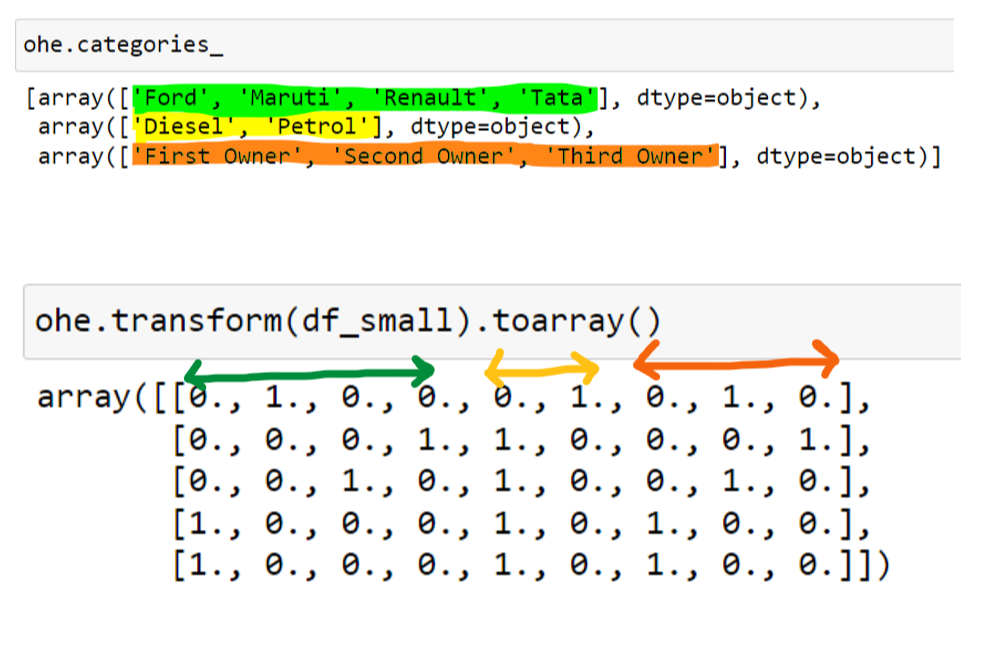

>>>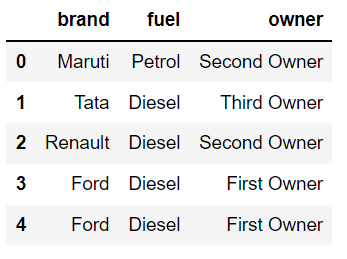

## Category selection

In [56]:
df_small

,brand,fuel,owner
0,Maruti,Petrol,Second Owner
1,Tata,Diesel,Third Owner
2,Renault,Diesel,Second Owner
3,Ford,Diesel,First Owner
4,Ford,Diesel,First Owner


In [70]:
ohe = OneHotEncoder()
ohe.fit(df_small[['fuel']])
ohe.transform(df_small[['fuel']]).toarray() # OHE on fuel features

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [74]:
ohe = OneHotEncoder()
ohe.fit_transform(df_small[['brand','fuel']]).toarray() #fit and transform together #OHE on brand and fuel

array([[0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.]])

## Drop the one feature

In [77]:
ohe = OneHotEncoder(drop='first')#default value 'None' # dropping the first column
ohe.fit_transform(df_small[['brand','fuel']]).toarray() #fit and transform together #OHE on brand and fuel

array([[1., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

## Drooping if_binary

If there are two unique value availabe in any feature then 1 columns will be created. 0 represent the first value and 1 is the second value.

In [78]:
ohe = OneHotEncoder(drop='if_binary')
ohe.fit_transform(df_small[['fuel']]).toarray()

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [79]:
df_small['fuel']

0    Petrol
1    Diesel
2    Diesel
3    Diesel
4    Diesel
Name: fuel, dtype: object

In [80]:
ohe.categories_

[array(['Diesel', 'Petrol'], dtype=object)]

`Diesel` has dropped and `Petrol` has been marked as `1` and `Diesel` as `0`.

## without sparse and changing dtype

In [82]:
ohe = OneHotEncoder(sparse=False,dtype=np.int32)
ohe.fit_transform(df_small[['fuel']])

array([[0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

## Others paremeters

`handle_unknown{‘error’, ‘ignore’, ‘infrequent_if_exist’}, default=’error’`
Specifies the way unknown categories are handled during transform.

* `‘error’` : Raise an error if an unknown category is present during transform.

* `‘ignore’` : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.

* `‘infrequent_if_exist’` : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted 'infrequent' if it exists. If the 'infrequent' category does not exist, then transform and inverse_transform will handle an unknown category as with handle_unknown='ignore'. Infrequent categories exist based on min_frequency and max_categories.

## Going through error for unknown category

In [86]:
ohe = OneHotEncoder(handle_unknown='error')
ohe.fit_transform(df_small[['brande','fuel']]).toarray() #fit and transform together #OHE on brand and fuel

KeyError: "['brande'] not in index"

## ignoring the unknown category

In [92]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit_transform(df_small).toarray()

array([[0., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.]])

In [94]:
ohe = OneHotEncoder(handle_unknown='ignore',drop='first')
ohe.fit_transform(df_small).toarray()

array([[1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])